In [1]:
import os

# Substitua 'C:/Caminho/Para/Seu/Diretorio' pelo caminho do diretório em sua máquina
diretorio_local = 'ImagensRadiomica/'

# Lista os arquivos no diretório
arquivos = os.listdir(diretorio_local)

# Imprime os nomes dos arquivos
for arquivo in arquivos:
    print(arquivo)



LIDC-IDRI-0002


In [4]:
import os
import numpy as np
import pydicom
ds = pydicom.read_file("ImagensRadiomica/LIDC-IDRI-0002/01-01-2000-NA-NA-26851/3000972.000000-NA-22902/1-1.dcm")
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.278396232245593731333696036781
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID        

In [5]:
import lungmask

In [19]:
import SimpleITK as sitk

# A file name that belongs to the series we want to read
file_name = r'ImagensRadiomica\LIDC-IDRI-0002\01-01-2000-NA-NA-98329\3000522.000000-NA-04919\1-001.dcm'
data_directory = r'ImagensRadiomica\LIDC-IDRI-0002\01-01-2000-NA-NA-98329\3000522.000000-NA-04919'

# Read the file's meta-information without reading bulk pixel data
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(file_name)
file_reader.ReadImageInformation()



# Get the sorted file names, opens all files in the directory and reads the meta-information
# without reading the bulk pixel data
series_ID = file_reader.GetMetaData('0020|000e')
sorted_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_ID)
sorted_file_names = sorted_file_names[::-1]

print(len(sorted_file_names))


261


In [22]:
img = sitk.ReadImage(sorted_file_names)

In [23]:
from lungmask import LMInferer

inferer = LMInferer(modelname="R231CovidWeb")

#podemos passar ou file_name (imagem take 198) ou img (todas as imagens do paciente)
segmentation = inferer.apply(img)  # default model is U-net(R231)

lungmask 2023-12-11 16:56:28 No GPU found, using CPU instead


14it [02:37, 11.25s/it]                           

lungmask 2023-12-11 16:59:08 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 128.64it/s]


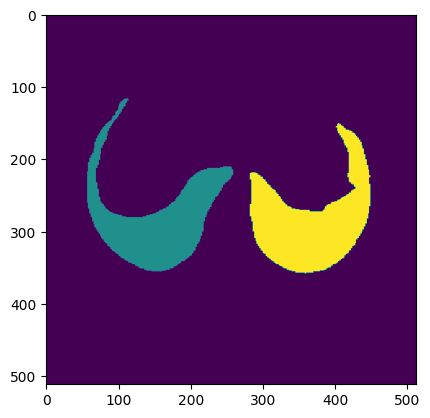

In [24]:
#Print Imagem
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt2

plt.imshow(segmentation[210,:,:]) #printar de 0 até 260